# LB5

In [164]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

## DOWNLOAD THE DATA

In [165]:
data = pd.read_csv('data/iris.data', header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [166]:
no_labeled_data = data.drop(columns=4)
no_labeled_data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## K-means

In [167]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=15)

In [168]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)

print(k_means_cluster_centers)
print(k_means_labels)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


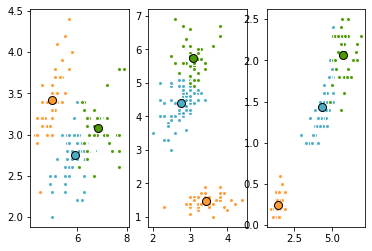

In [169]:
f, ax = plt.subplots(1, 3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for i in range(3):
    my_members = k_means_labels == i
    cluster_center = k_means_cluster_centers[i]

    for j in range(3):
        ax[j].plot(no_labeled_data[my_members][j],
                   no_labeled_data[my_members][j+1],
                   'w',
                   markerfacecolor=colors[i],
                   marker='o',
                   markersize=4)

        ax[j].plot(cluster_center[j],
                   cluster_center[j+1],
                   'o',
                   markerfacecolor=colors[i],
                   markeredgecolor='k',
                   markersize=8)

plt.show()

In [170]:
reduced_data = PCA(n_components=2).fit_transform(no_labeled_data)

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=15)
kmeans.fit(reduced_data)

KMeans(n_clusters=3, n_init=15)

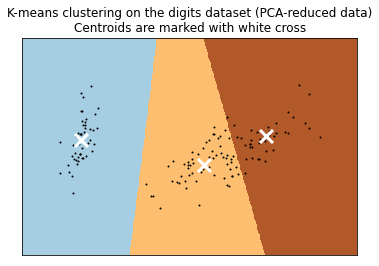

In [171]:
h = .02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## AgglomerativeClustering

In [172]:
hier = AgglomerativeClustering(n_clusters=3, linkage='average')
hier = hier.fit(no_labeled_data)
hier_labels = hier.labels_

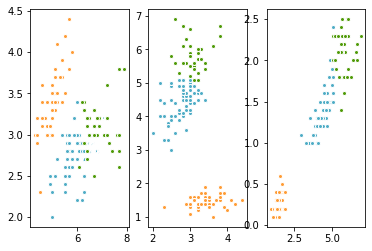

In [173]:
f, ax = plt.subplots(1, 3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for i in range(3):
    my_members = hier_labels == i

    for j in range(3):
        ax[j].plot(no_labeled_data[my_members][j],
                   no_labeled_data[my_members][j+1],
                   'w',
                   markerfacecolor=colors[i],
                   marker='o',
                   markersize=4)
plt.show()